In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/train.csv",sep=",")

# Miramos la correlación entre distintas variables

Analizamos la correlación del target (pollutant) con las variables (numéricas):

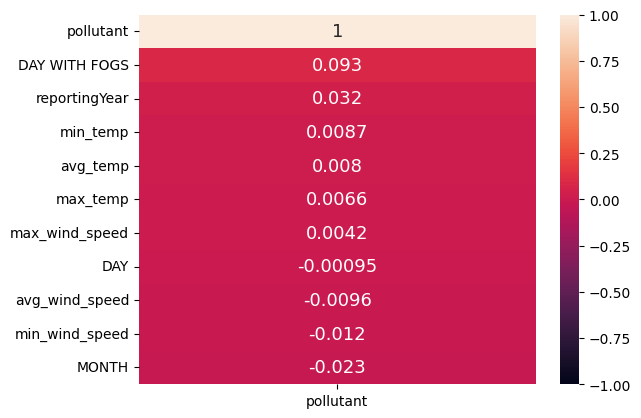

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr()[['pollutant']].sort_values(by='pollutant', ascending=False), vmin=-1, vmax=1, annot=True, annot_kws={"size":13});

Analizamos la correlación entre las distintas variables numéricas entre sí (para ver si puede haber redundancias):

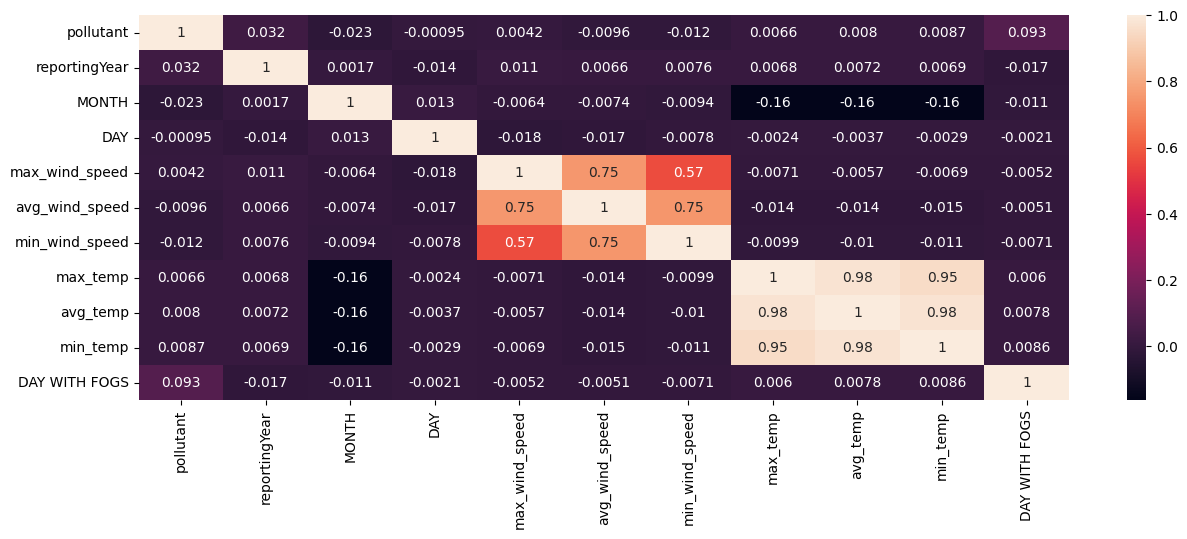

In [4]:
plt.figure(figsize=(15,5))

corr = df.corr()
sns.heatmap(corr, annot=True);

Seguimos buscando posibles relaciones entre features del conjunto de datos.

In [5]:
from sklearn.model_selection import train_test_split

X = df[["eprtrSectorName", 'EPRTRAnnexIMainActivityLabel', "avg_wind_speed", 'avg_temp', 'min_temp', 'min_wind_speed', 'max_temp', 'max_wind_speed', 'countryName', "DAY WITH FOGS", 'MONTH', 'reportingYear']]
y = df["pollutant"]
X = pd.get_dummies(X)
X = pd.get_dummies(X, columns=['MONTH', 'reportingYear'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Matrix de Pearson

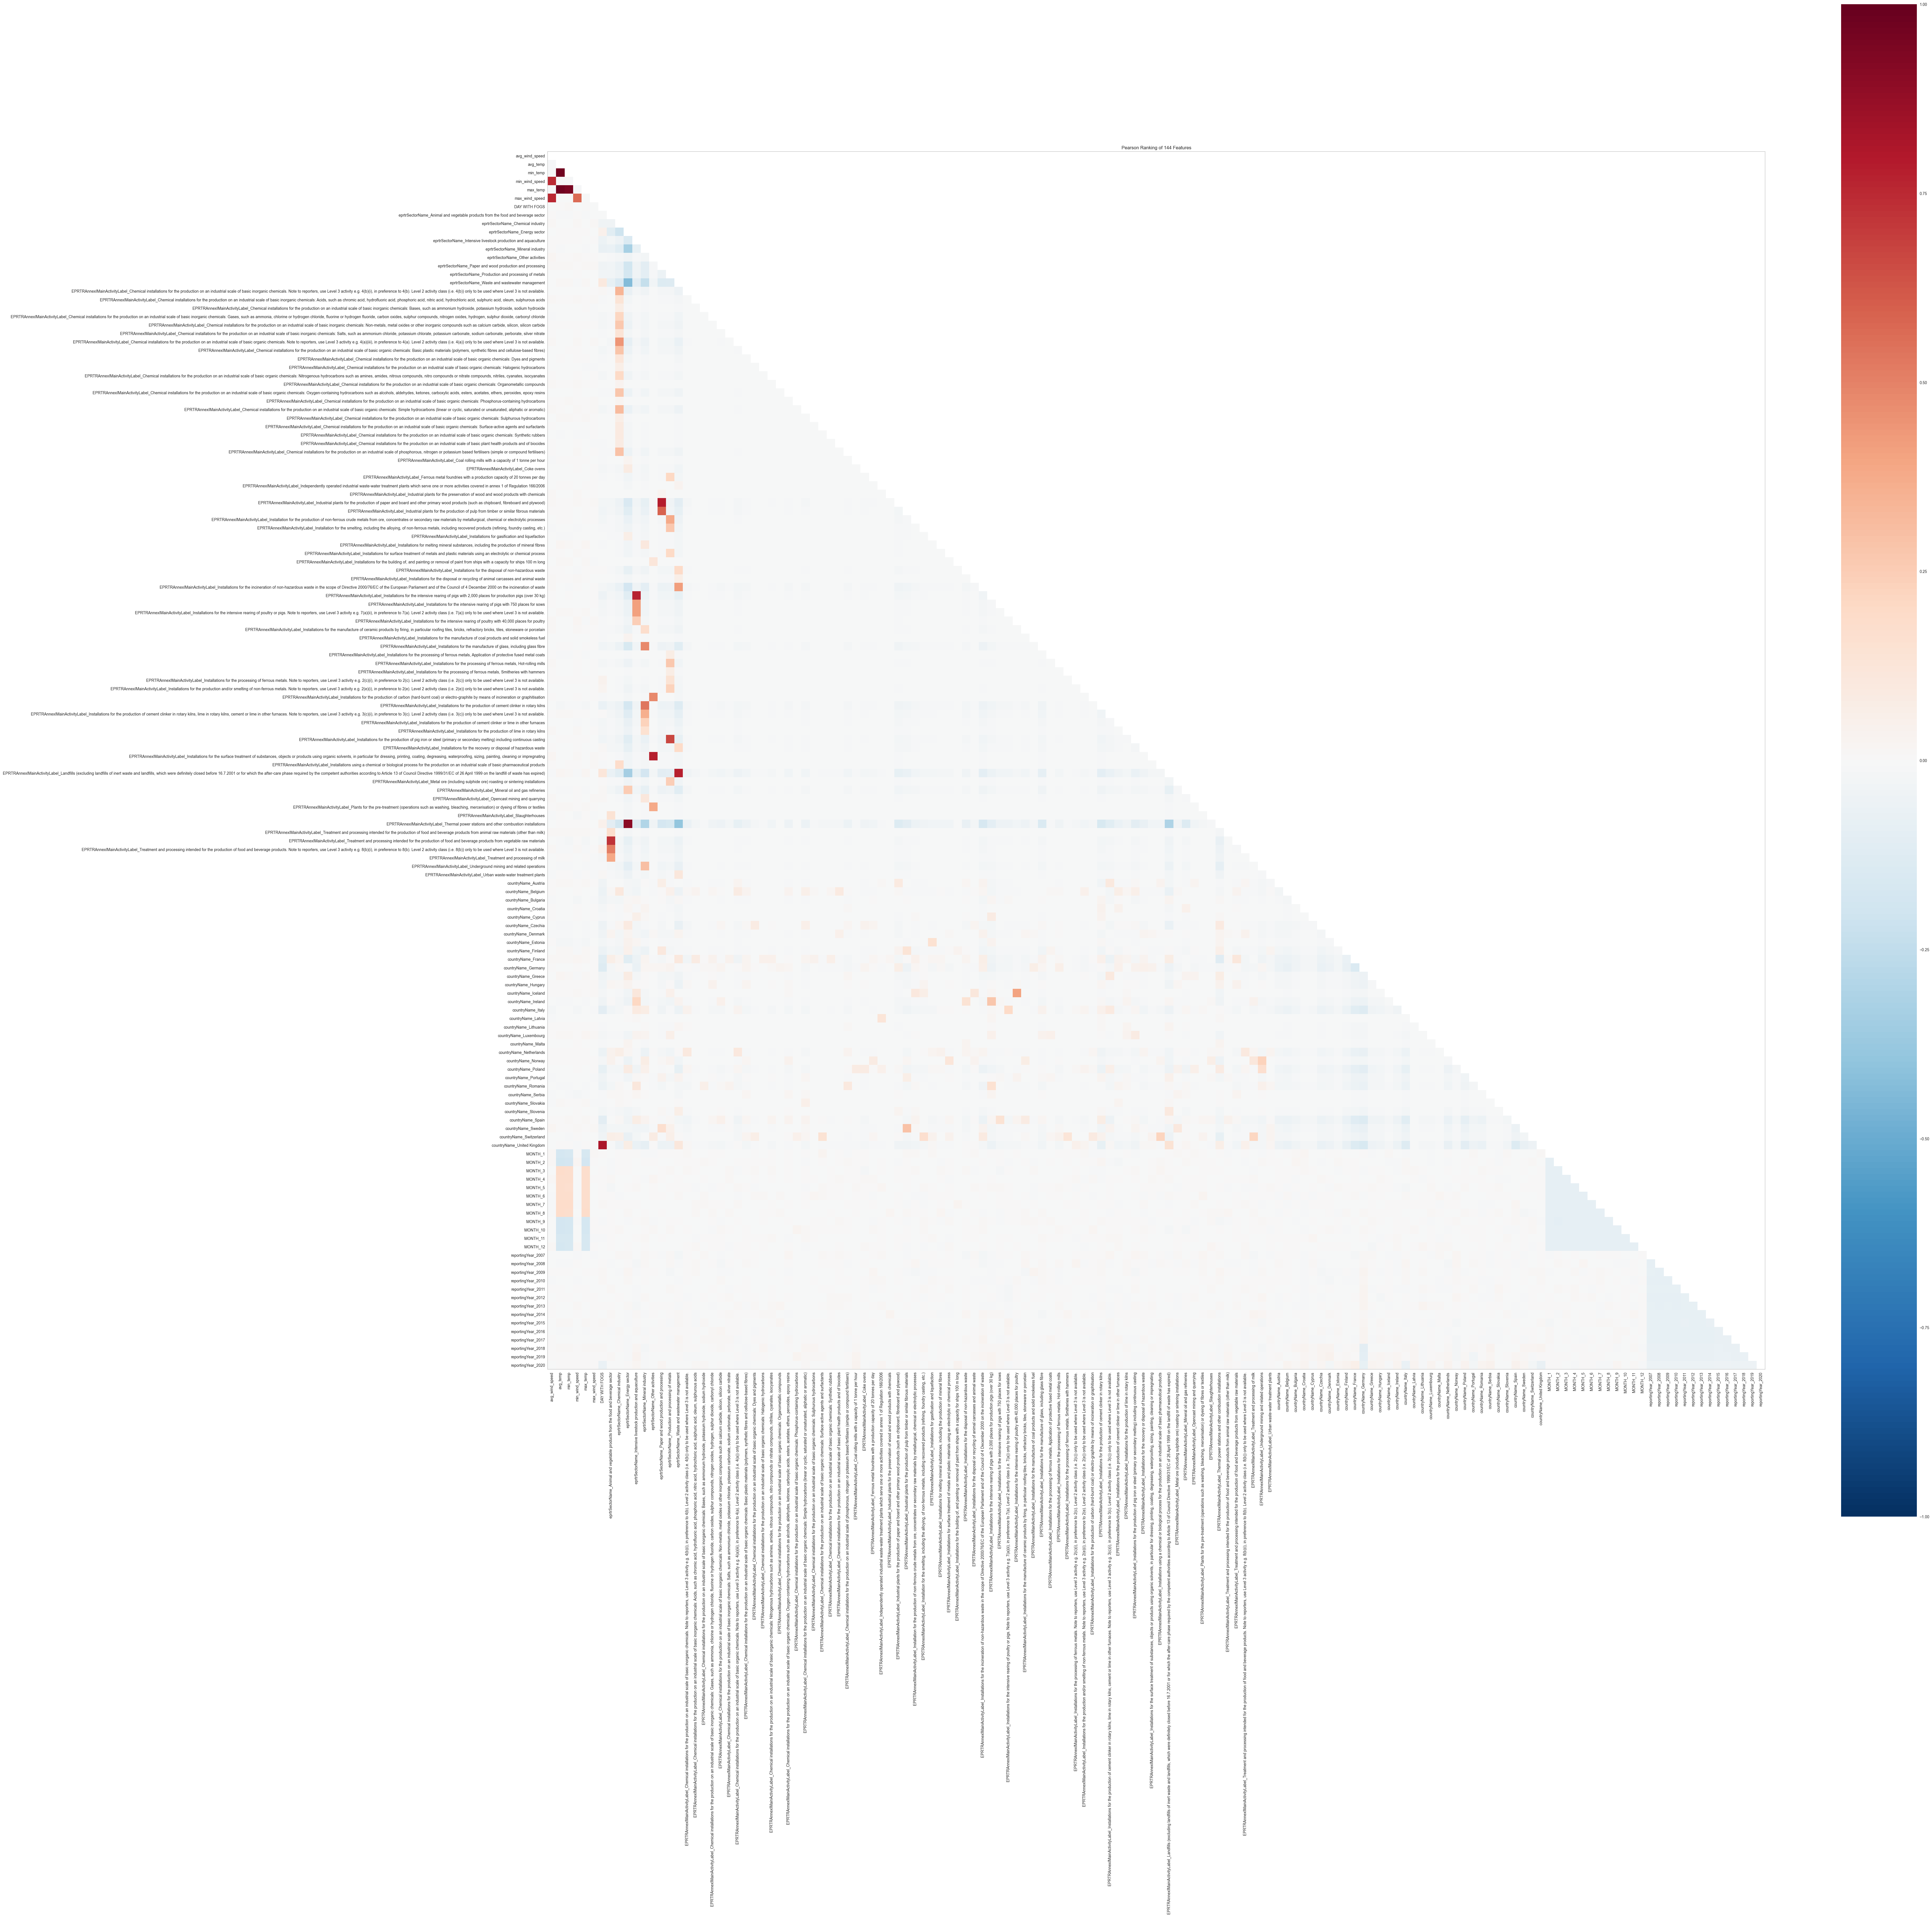

In [6]:
from yellowbrick.features import Rank2D

plt.figure(figsize=(70, 70))

visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X_train, y_train)           
visualizer.transform(X)        
visualizer.show();

Vemos que no hay ninguna relación fuerte con ninguna de las variables.

# Creamos un árbol de decisión

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=15, random_state=0, min_samples_leaf=30)
tree.fit(X_train, y_train);

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_hat = tree.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_hat)
f1_s = f1_score(y_true=y_test, y_pred=y_hat, average='macro')

print('Primer modelo entrenado (árbol de decisión)')
print(f'Accuracy: {acc}')
print(f'F1 Score: {f1_s}')

Primer modelo entrenado (árbol de decisión)
Accuracy: 0.6068057625434674
F1 Score: 0.5921869309655613


## Utilizamos el árbol de decisión para ver la importancia de las distintas features del modelo

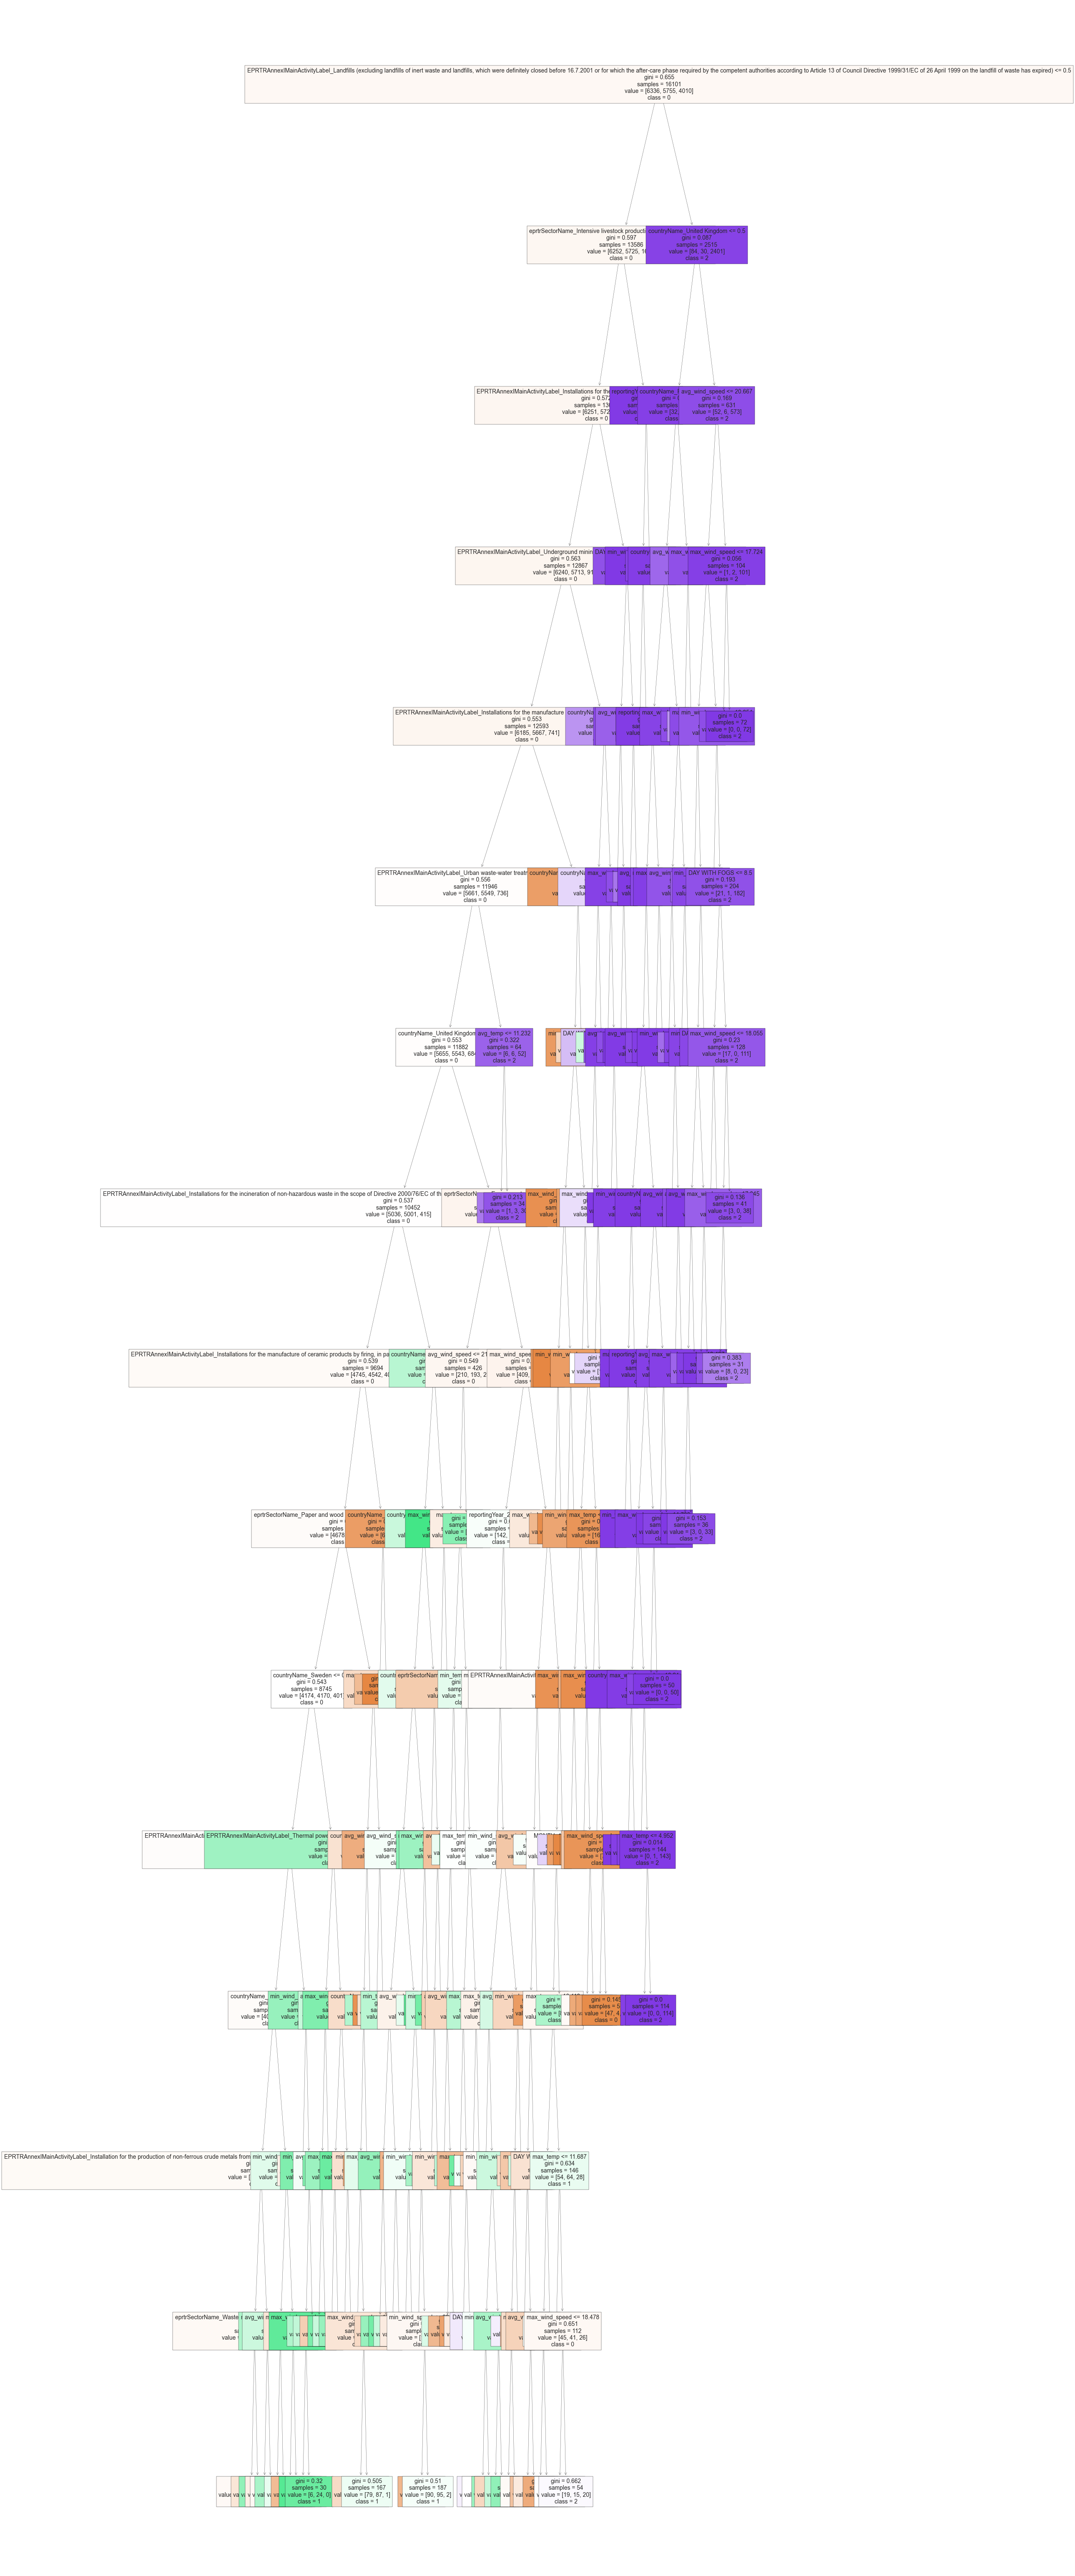

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 80))
plot_tree(tree, feature_names=X_train.columns, class_names=['0','1','2'], filled=True, fontsize=10);

c:\users\rocio\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


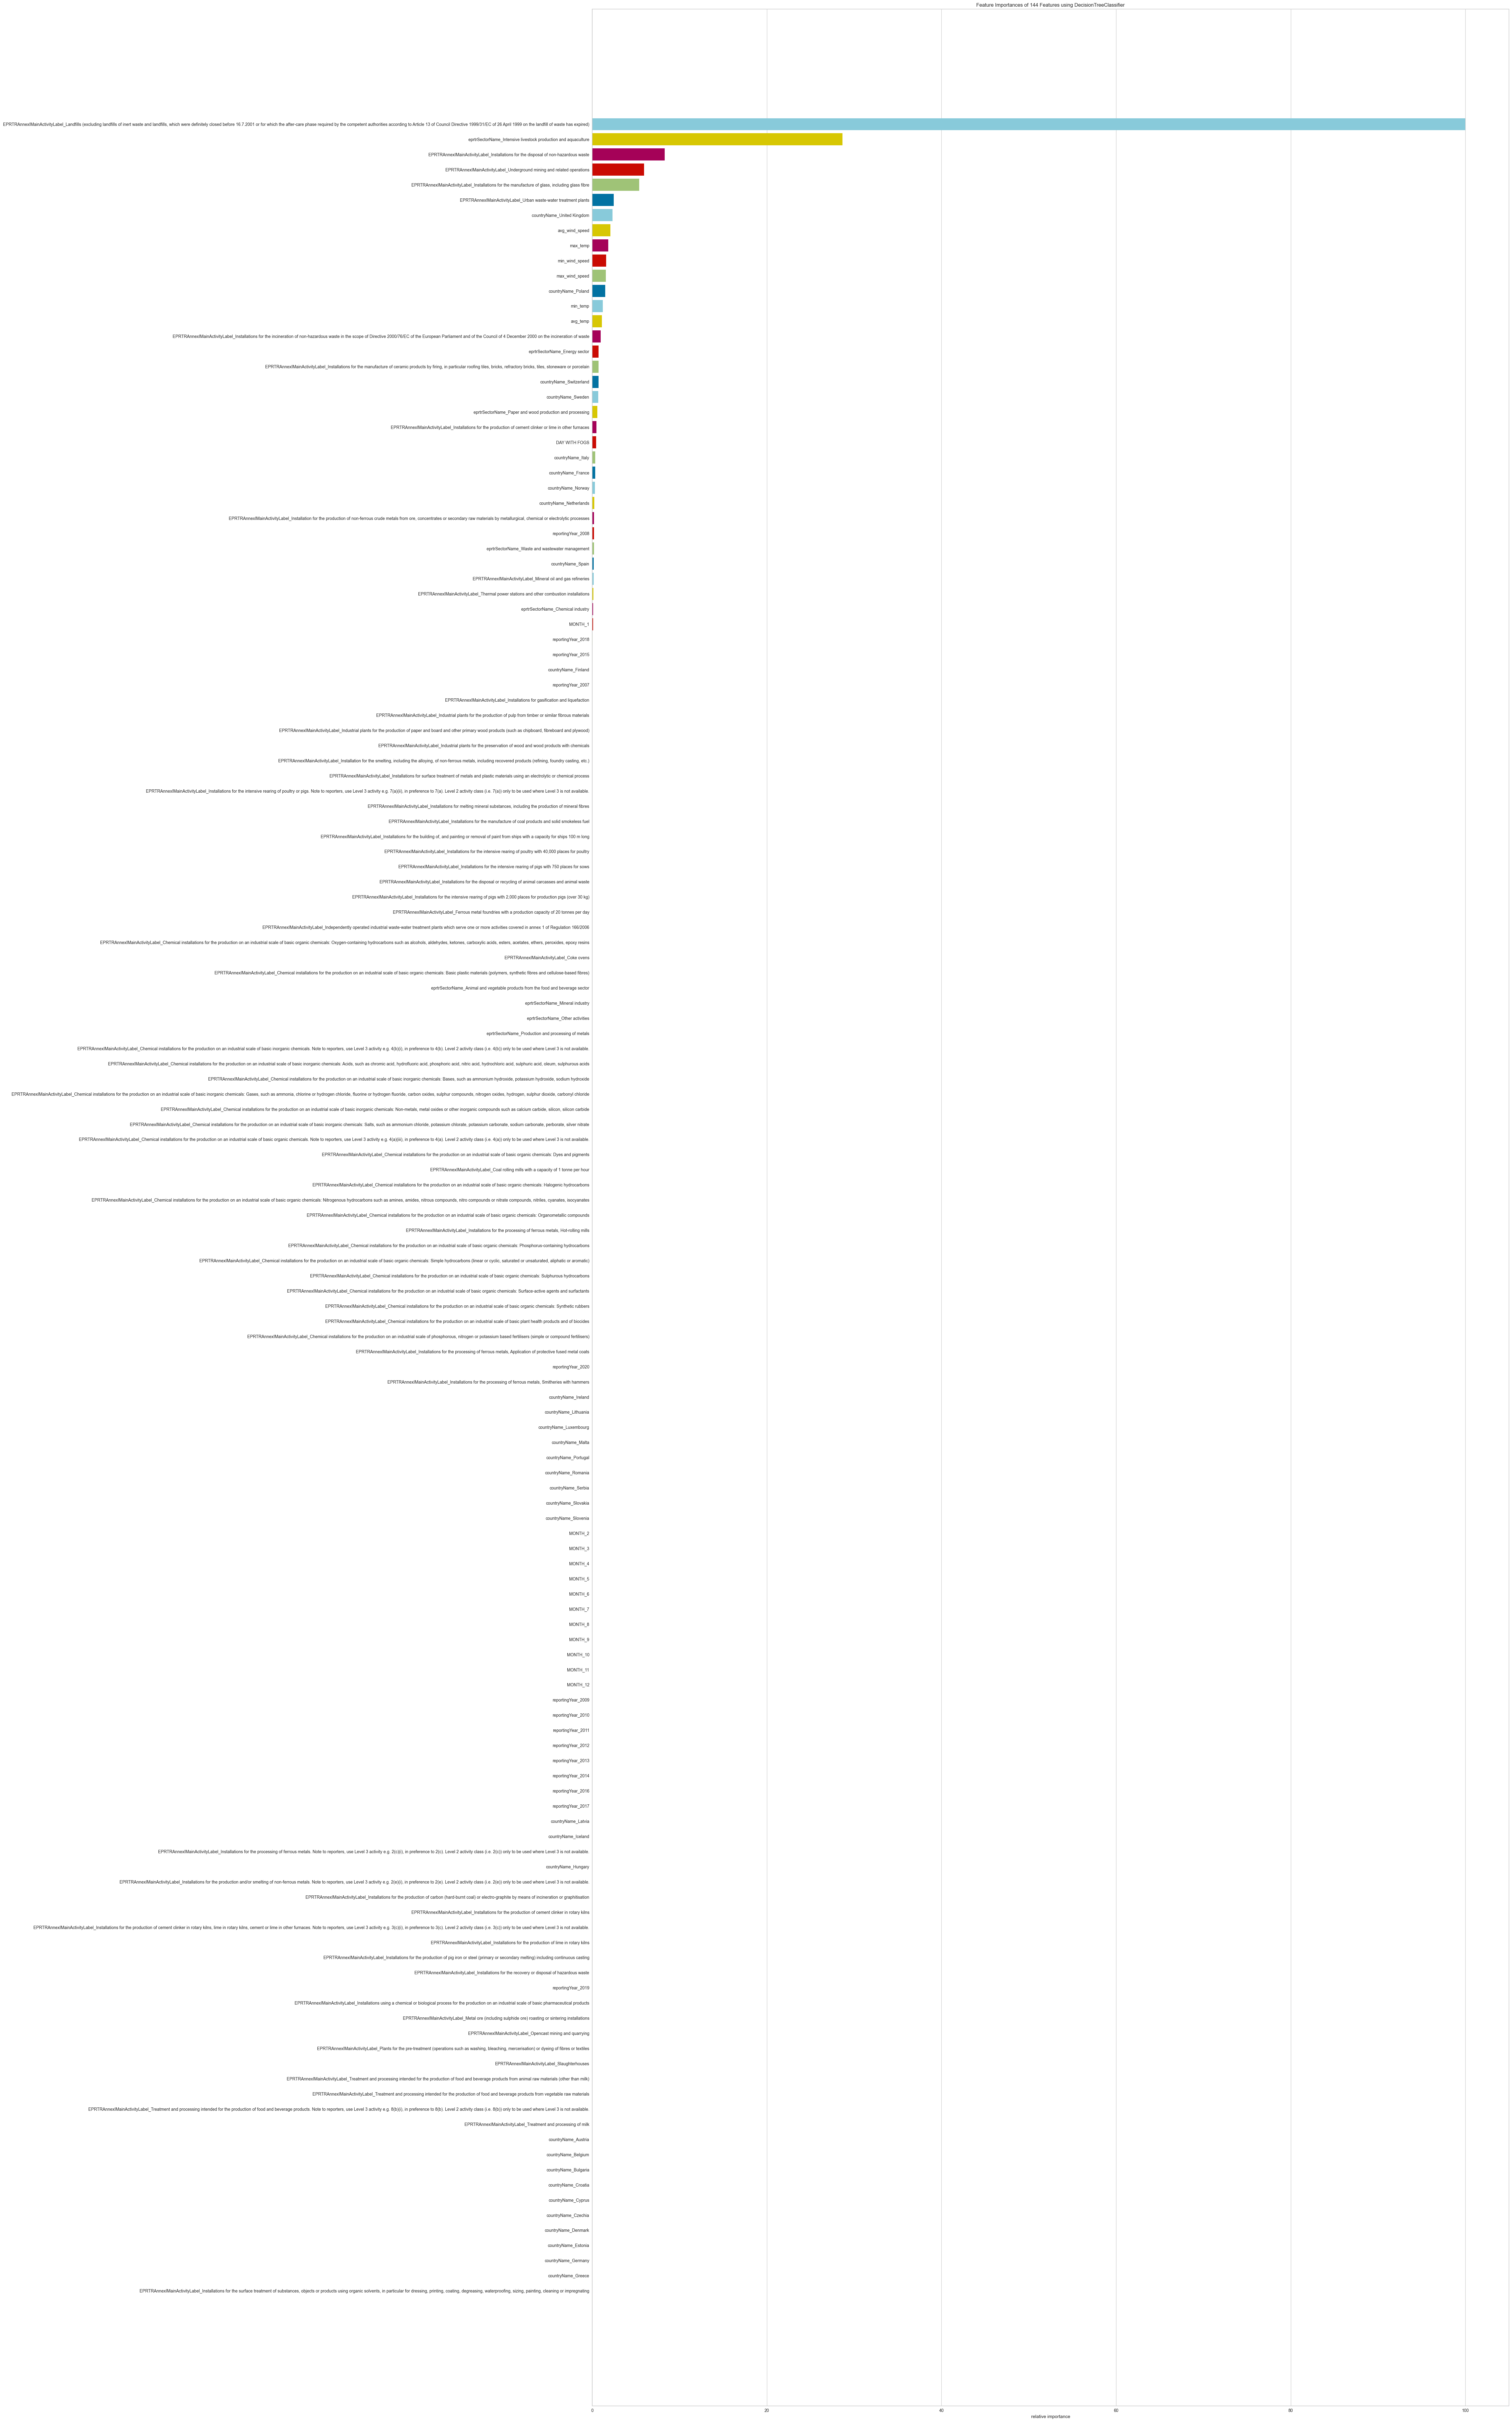

In [10]:
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(50, 80))

viz = FeatureImportances(tree)
viz.fit(X_train, y_train)
viz.show();

Vemos que las variables de año y mes no tienen demasiada importance, mientras que los paises y determinadas industrias sí permiten clasificar mucho mejor. Vamos a ajustar el conjunto de features que utilizaremos para el entrenamiento de varios modelos.